In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#input file path to be processed
file_path = input('Enter the file path')

Enter the file path transaction_data.csv


In [17]:
df = pd.read_csv("transaction_data.csv")

In [18]:
df.head(10)

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
5,10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36.0,2.88,38.88
6,10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,14.04,189.54
7,10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,2.98,40.18
8,10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,10,440.0,35.20,475.20
9,10304,4,9/12/2023,Nancy Davolio,71,Flotemysost,15,Norske Meierier,17.2,2,34.4,2.75,37.15


In [9]:
#2 I used:
#Group Data by Product and Month: First, convert the transaction date to datetime format, then extract month and year.

#Aggregate Sales and Quantity Sold: Group by product and month to get sales and quantity sold per product monthly.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

monthly_product_performance = df.groupby(['ProductName', 'Month']).agg({
    'Quantity': 'sum',
    'OrderTotal': 'sum'
})   

monthly_product_performance



Quantity  OrderTotal
ProductName   Month                        
Alice Mutton  2023-08        30     1010.88
              2023-10        28      943.49
              2024-01         2       67.39
              2024-02        10      336.96
              2024-05         8      336.96
...                         ...         ...
Zaanse koeken 2024-07        15      153.90
              2024-09        31      318.06
              2024-10        17      174.42
              2025-02        21      215.46
              2025-03        19      194.94

[881 rows x 2 columns]

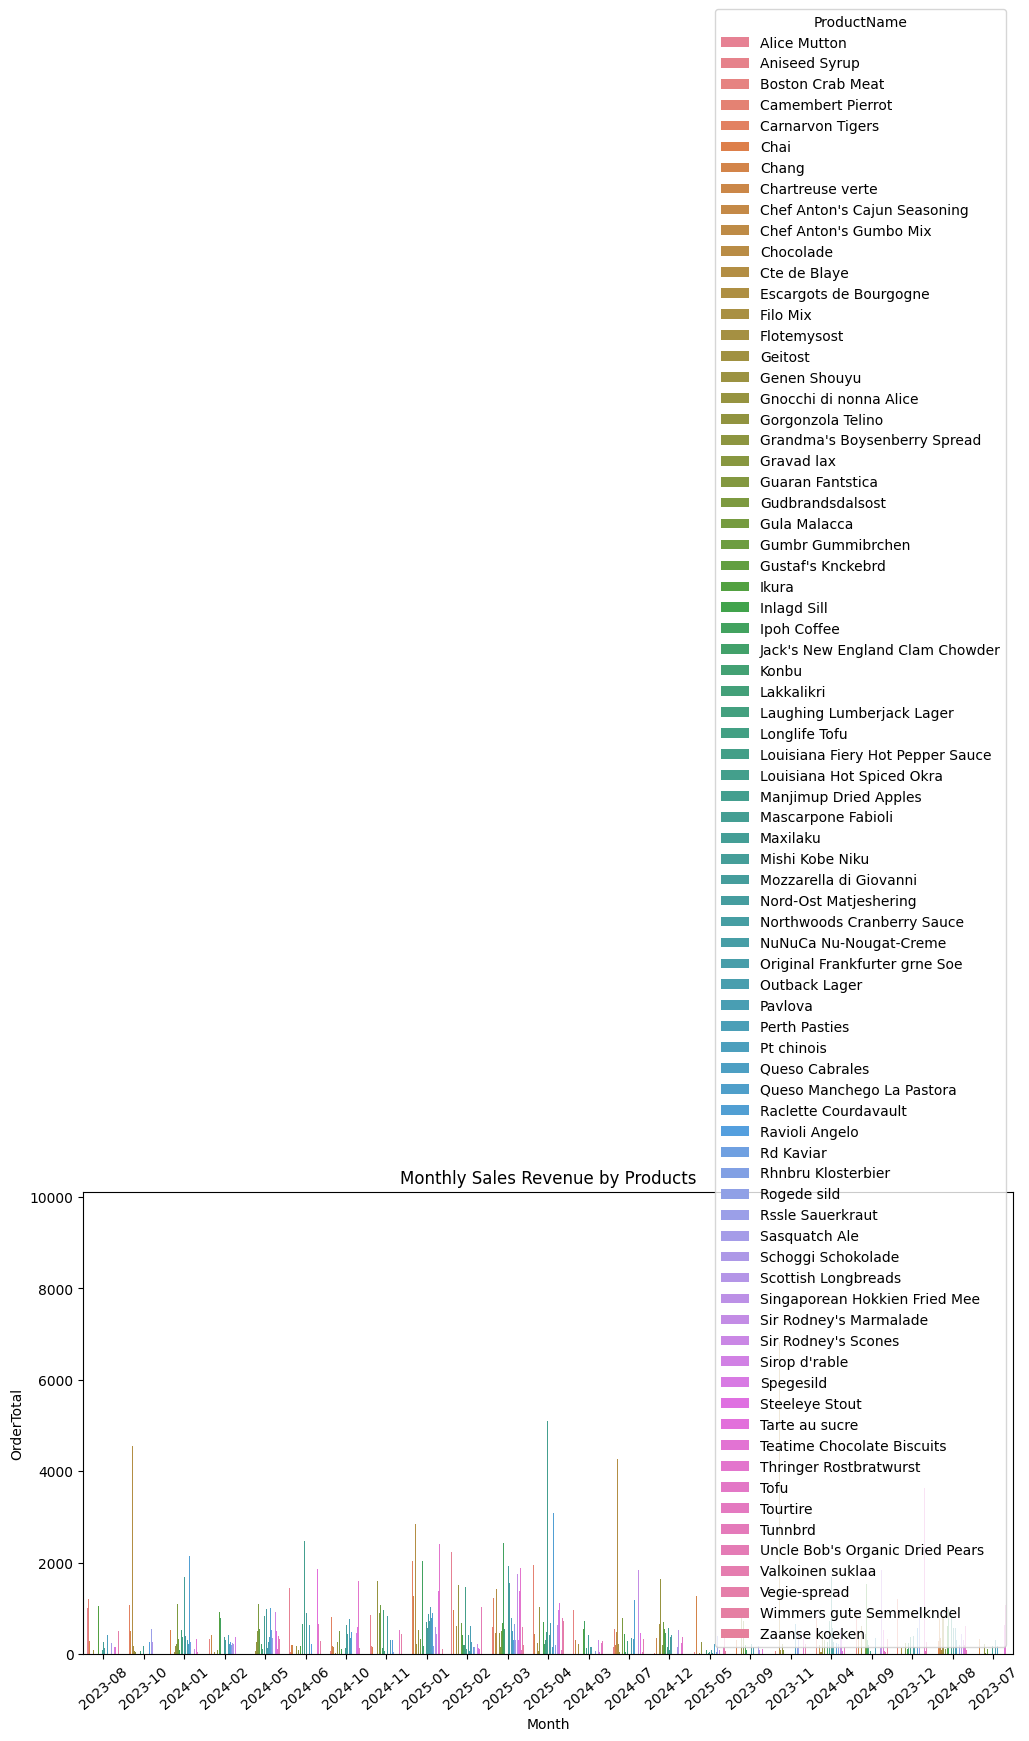

In [47]:

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_product_performance, x='Month', y='OrderTotal', hue='ProductName')
plt.title("Monthly Sales Revenue by Products")
plt.xlabel("Month")
plt.ylabel("OrderTotal")
plt.xticks(rotation=40)
plt.show()

#There is a lot going on in this diagram, but basically this shows the trend of monthly performance of products over the years.



In [14]:
# Grouped by 'ProductName' and sum 'OrderTotal'
total_sales_per_product = df.groupby('ProductName')['OrderTotal'].sum().reset_index()

# 'OrderTotal' is numeric in the resulting DataFrame
total_sales_per_product['OrderTotal'] = pd.to_numeric(total_sales_per_product['OrderTotal'], errors='coerce')

# Sorted by 'OrderTotal' in descending order if desired
total_sales_per_product.sort_values(by='OrderTotal', ascending=False, inplace=True)


total_sales_per_product


,ProductName,OrderTotal
68,Thringer Rostbratwurst,39943.16
11,Cte de Blaye,33865.02
66,Tarte au sucre,18876.56
36,Manjimup Dried Apples,17618.48
17,Gnocchi di nonna Alice,17400.96
...,...,...
10,Chocolade,895.05
1,Aniseed Syrup,864.00
15,Geitost,716.04
16,Genen Shouyu,703.08


In [16]:
employee_sales_performance = df.groupby('Employee').agg({
    'OrderTotal': 'sum',
    'Quantity': 'sum'
}).reset_index().sort_values(by='OrderTotal', ascending=False)
employee_sales_performance

,Employee,OrderTotal,Quantity
4,Margaret Peacock,102093.97,3308
6,Nancy Davolio,75095.44,2495
2,Janet Leverling,61935.82,2552
3,Laura Callahan,61575.87,2250
0,Andrew Fuller,53549.87,1829
5,Michael Suyama,37691.47,1532
7,Robert King,31964.33,1299
1,Anne Dodsworth,27232.47,822
8,Steven Buchanan,23087.99,1004


In [17]:
##Vizualization: Plot total sales per employee to assess top performers.                                       

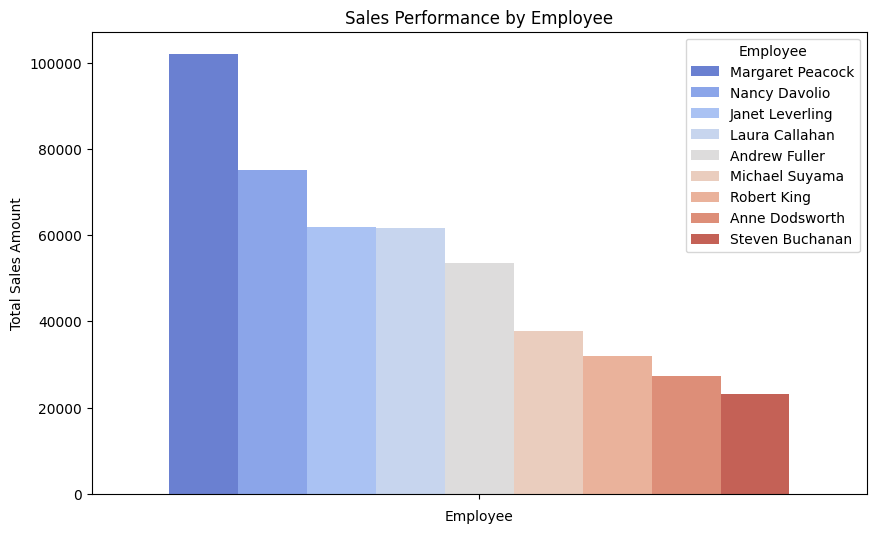

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=employee_sales_performance, hue='Employee', y='OrderTotal', palette='coolwarm')
plt.title("Sales Performance by Employee")
plt.xlabel("Employee")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby('Month')['OrderTotal'].sum().reset_index()


In [22]:
print(monthly_sales)

    Month  OrderTotal
0       1    49850.66
1       2    39629.13
2       3    52993.39
3       4    57347.40
4       5    27184.62
5       6    19929.77
6       7    28946.29
7       8    40779.94
8       9    32936.65
9      10    36589.13
10     11    35921.69
11     12    52118.56


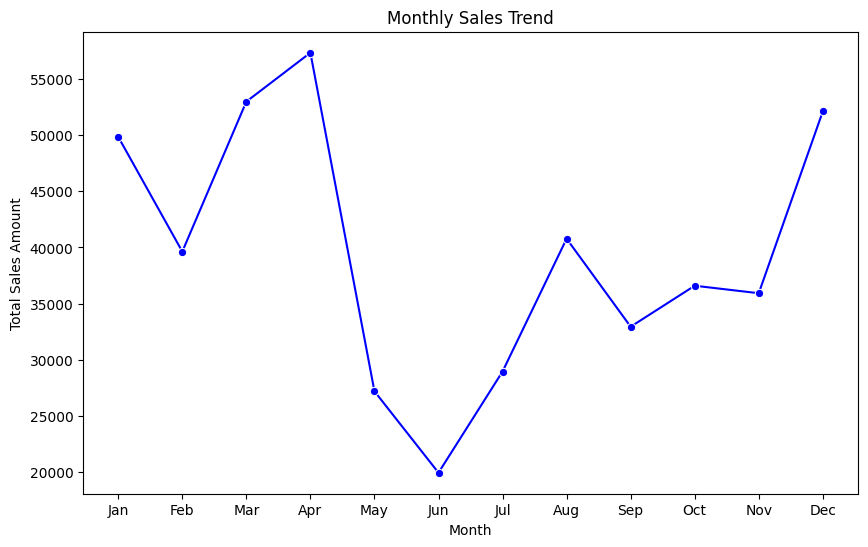

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='OrderTotal', marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



In [67]:
#2. Ensured 'Date' is in datetime format 
# Extracted the month from the 'Date' column
# Filtered for April 
# Used Group by 'ProductName' and sum the 'OrderTotal'
# Sorted by 'OrderTotal' in descending order to get the top-selling product

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
april_sales = df[df['Month'] == 4]
product_sales_april = april_sales.groupby('ProductName')['OrderTotal'].sum().reset_index()
top_product_april = product_sales_april.sort_values(by='OrderTotal', ascending=False).head(10)


print(top_product_april)


                  ProductName  OrderTotal
29      Manjimup Dried Apples     5094.36
8                Cte de Blaye     4268.70
43       Raclette Courdavault     3326.40
2           Camembert Pierrot     2754.00
46           Rssle Sauerkraut     2511.64
54             Tarte au sucre     1916.78
42  Queso Manchego La Pastora     1805.76
32            Mishi Kobe Niku     1676.16
55     Thringer Rostbratwurst     1604.32
13     Gnocchi di nonna Alice     1485.65


In [25]:
#Insights on this:
##Identifying Peak Sales Times, the plots will reveal peak months, quarters, or seasons. For instance, if you see a consistent spike in products purchase, it may be tied to holiday shopping.
##Seasonality Insights, knowing high-performing seasons can inform stock management, marketing campaigns, and staffing.
##yearly Trends, Comparing sales across years for specific months or quarters can show growth or indicate areas that need improvement.

In [66]:
# Group data by CustomerID to calculate total, average, and count of transactions
customer_spending = df.groupby('CustID')['OrderTotal'].agg(['sum', 'mean', 'count']).reset_index()
customer_spending.columns = ['CustID', 'TotalSpent', 'AvgTransactionValue', 'TransactionCount']

# Display the first few rows of the result
customer_spending.head()




,CustID,TotalSpent,AvgTransactionValue,TransactionCount
0,1,16253.45,524.304839,31
1,2,2598.54,216.545000,12
2,3,5820.25,582.025000,10
3,4,10611.17,408.121923,26
4,5,1584.68,113.191429,14


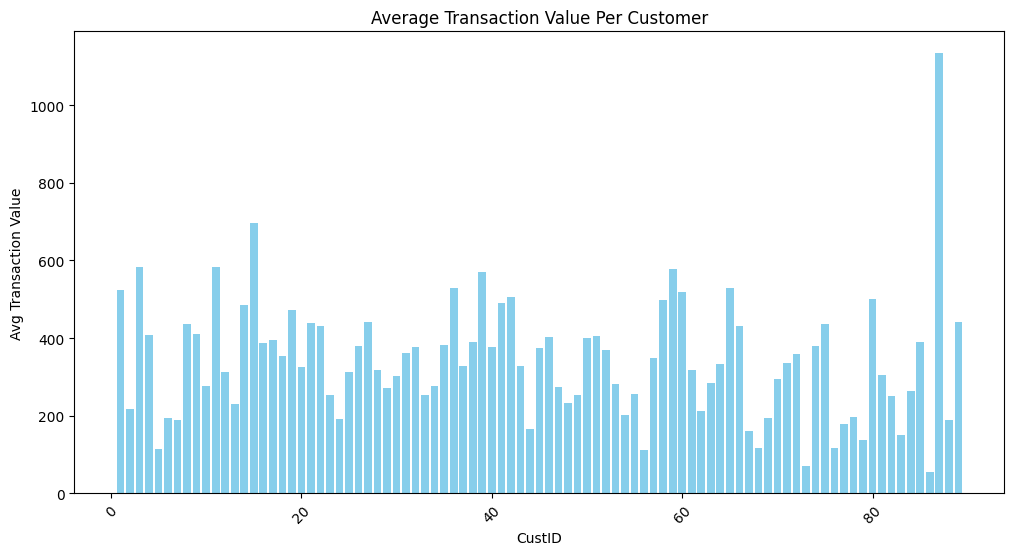

In [65]:
Bar chart for average transaction value per customer
plt.figure(figsize=(12, 6))
plt.bar(customer_spending['CustID'], customer_spending['AvgTransactionValue'], color='skyblue')
plt.title('Average Transaction Value Per Customer')
plt.xlabel('CustID')
plt.ylabel('Avg Transaction Value')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Group by CustID to count unique products purchased
customer_transactions =df.groupby('CustID')['ProductID'].nunique().reset_index()
customer_transactions.columns = ['CustID', 'UniqueProductCount']

# Filter customers who purchased more than one product
repeat_customers = customer_transactions[customer_transactions['UniqueProductCount'] > 1]

# Merge back to the original dataset to get full details for repeat customers
repeat_customer_data = df[df['CustID'].isin(repeat_customers['CustID'])]

# Display repeat customers
repeat_customer_data.head()



,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal,Month
0,10258,1,2023-07-17,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89,2023-07
1,10275,2,2023-08-07,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66,2023-08
2,10275,2,2023-08-07,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12,2023-08
3,10292,3,2023-08-28,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68,2023-08
4,10293,4,2023-08-29,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00,2023-08


In [56]:
df.to_csv("insights_on_transactional_data", index=False)